# Time series analysis using the Fourier Transform for DInSAR
This analysis is based on https://github.com/MorcilloSanz/fourier-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

%matplotlib inline

Load the time series of 4 points of the same place for SBAS and EGMS

In [2]:
dates_sbas = ["2017-08-01","2017-08-07","2017-08-13","2017-08-19","2017-08-25","2017-08-31","2017-09-06","2017-09-12","2017-09-18","2017-09-24","2017-09-30","2017-10-06","2017-10-12","2017-10-18","2017-10-24","2017-10-30","2017-11-05","2017-11-11","2017-11-17","2017-11-23","2017-11-29","2017-12-05","2017-12-11","2017-12-17","2017-12-23","2017-12-29","2018-01-04","2018-01-10","2018-01-16","2018-01-22","2018-01-28","2018-02-03","2018-02-09","2018-02-15","2018-02-21","2018-02-27","2018-03-05","2018-03-11","2018-03-17","2018-03-23","2018-03-29","2018-04-04","2018-04-10","2018-04-16","2018-04-22","2018-04-28","2018-05-04","2018-05-10","2018-05-16","2018-05-22","2018-05-28","2018-06-03","2018-06-09","2018-06-15","2018-06-21","2018-06-27","2018-07-03","2018-07-09","2018-07-15","2018-07-21","2018-07-27","2018-08-02","2018-08-08","2018-08-14","2018-08-20","2018-08-26","2018-09-01","2018-09-07","2018-09-13","2018-09-19","2018-09-25","2018-10-01","2018-10-07","2018-10-13","2018-10-19","2018-10-25","2018-10-31","2018-11-06","2018-11-12","2018-11-18","2018-11-24","2018-11-30","2018-12-06","2018-12-12","2018-12-18","2018-12-24","2018-12-30","2019-01-05","2019-01-11","2019-01-17","2019-01-23","2019-01-29","2019-02-04","2019-02-10","2019-02-16","2019-02-22","2019-02-28","2019-03-06","2019-03-12","2019-03-18","2019-03-24","2019-03-30","2019-04-05","2019-04-11","2019-04-17","2019-04-23","2019-04-29","2019-05-05","2019-05-11","2019-05-17","2019-05-23","2019-05-29","2019-06-04","2019-06-10","2019-06-16","2019-06-22","2019-06-28","2019-07-04","2019-07-10","2019-07-16","2019-07-22","2019-07-28","2019-08-03","2019-08-09","2019-08-15","2019-08-21","2019-08-27","2019-09-02","2019-09-08","2019-09-14","2019-09-20","2019-09-26","2019-10-02","2019-10-08","2019-10-14","2019-10-20","2019-10-26","2019-11-01","2019-11-07","2019-11-13","2019-11-19","2019-11-25","2019-12-01","2019-12-07","2019-12-13","2019-12-19","2019-12-25","2019-12-31","2020-01-06","2020-01-12","2020-01-18","2020-01-24","2020-01-30","2020-02-05","2020-02-11","2020-02-17","2020-02-23","2020-02-29","2020-03-06","2020-03-12","2020-03-18","2020-03-24","2020-03-30","2020-04-05","2020-04-11","2020-04-17","2020-04-23","2020-04-29","2020-05-05","2020-05-11","2020-05-17","2020-05-23","2020-05-29","2020-06-04","2020-06-10","2020-06-16","2020-06-22","2020-06-28","2020-07-04","2020-07-10","2020-07-16","2020-07-22","2020-07-28","2020-08-03","2020-08-09","2020-08-15","2020-08-21","2020-08-27","2020-09-02","2020-09-08","2020-09-14","2020-09-20","2020-09-26","2020-10-02","2020-10-08","2020-10-14","2020-10-20","2020-10-26","2020-11-01","2020-11-07","2020-11-13","2020-11-19","2020-11-25","2020-12-01","2020-12-07","2020-12-13","2020-12-19","2020-12-25","2020-12-31","2021-01-06","2021-01-12","2021-01-18","2021-01-24","2021-01-30","2021-02-05","2021-02-11","2021-02-17","2021-02-23","2021-03-01","2021-03-07","2021-03-13","2021-03-19","2021-03-25","2021-03-31","2021-04-06","2021-04-12","2021-04-18","2021-04-24","2021-04-30","2021-05-06","2021-05-12","2021-05-18","2021-05-24","2021-05-30","2021-06-05","2021-06-11","2021-06-17","2021-06-23","2021-06-29","2021-07-05","2021-07-11","2021-07-17","2021-07-23","2021-07-29","2021-08-04","2021-08-10","2021-08-16","2021-08-22","2021-08-28","2021-09-03","2021-09-09","2021-09-15","2021-09-21","2021-09-27","2021-10-03","2021-10-09","2021-10-15","2021-10-21","2021-10-27","2021-11-02","2021-11-08","2021-11-14","2021-11-20","2021-11-26","2021-12-02","2021-12-08","2021-12-14","2021-12-20","2021-12-26"]
dates_egms = ["2019-01-07","2019-01-13","2019-01-19","2019-01-25","2019-01-31","2019-02-06","2019-02-12","2019-02-18","2019-02-24","2019-03-02","2019-03-08","2019-03-14","2019-03-20","2019-03-26","2019-04-01","2019-04-07","2019-04-13","2019-04-19","2019-04-25","2019-05-01","2019-05-07","2019-05-13","2019-05-19","2019-05-25","2019-05-31","2019-06-06","2019-06-12","2019-06-18","2019-06-24","2019-06-30","2019-07-06","2019-07-12","2019-07-18","2019-07-24","2019-07-30","2019-08-05","2019-08-11","2019-08-17","2019-08-23","2019-08-29","2019-09-04","2019-09-10","2019-09-16","2019-09-22","2019-09-28","2019-10-04","2019-10-10","2019-10-16","2019-10-22","2019-10-28","2019-11-03","2019-11-09","2019-11-15","2019-11-21","2019-11-27","2019-12-03","2019-12-09","2019-12-15","2019-12-21","2019-12-27","2020-01-02","2020-01-08","2020-01-14","2020-01-20","2020-01-26","2020-02-01","2020-02-07","2020-02-13","2020-02-19","2020-02-25","2020-03-02","2020-03-08","2020-03-14","2020-03-20","2020-03-26","2020-04-01","2020-04-07","2020-04-13","2020-04-19","2020-04-25","2020-05-01","2020-05-07","2020-05-13","2020-05-19","2020-05-25","2020-05-31","2020-06-06","2020-06-12","2020-06-18","2020-06-24","2020-06-30","2020-07-06","2020-07-12","2020-07-18","2020-07-24","2020-07-30","2020-08-05","2020-08-11","2020-08-17","2020-08-23","2020-08-29","2020-09-04","2020-09-10","2020-09-16","2020-09-22","2020-09-28","2020-10-04","2020-10-10","2020-10-16","2020-10-22","2020-10-28","2020-11-03","2020-11-09","2020-11-15","2020-11-21","2020-11-27","2020-12-03","2020-12-09","2020-12-15","2020-12-21","2020-12-27","2021-01-02","2021-01-08","2021-01-14","2021-01-20","2021-01-26","2021-02-01","2021-02-07","2021-02-13","2021-02-19","2021-02-25","2021-03-03","2021-03-09","2021-03-15","2021-03-21","2021-03-27","2021-04-02","2021-04-08","2021-04-14","2021-04-20","2021-04-26","2021-05-02","2021-05-08","2021-05-14","2021-05-20","2021-05-26","2021-06-01","2021-06-07","2021-06-13","2021-06-19","2021-06-25","2021-07-01","2021-07-07","2021-07-13","2021-07-19","2021-07-25","2021-07-31","2021-08-06","2021-08-12","2021-08-18","2021-08-24","2021-08-30","2021-09-05","2021-09-11","2021-09-17","2021-09-23","2021-09-29","2021-10-05","2021-10-11","2021-10-17","2021-10-23","2021-10-29","2021-11-04","2021-11-10","2021-11-16","2021-11-22","2021-11-28","2021-12-04","2021-12-10","2021-12-16","2021-12-22","2021-12-28","2022-01-03","2022-01-09","2022-01-15","2022-01-21","2022-01-27","2022-02-02","2022-02-08","2022-02-14","2022-02-20","2022-02-26","2022-03-04","2022-03-10","2022-03-16","2022-03-22","2022-03-28","2022-04-03","2022-04-09","2022-04-15","2022-04-21","2022-04-27","2022-05-03","2022-05-09","2022-05-15","2022-05-21","2022-05-27","2022-06-02","2022-06-08","2022-06-14","2022-06-20","2022-06-26","2022-07-02","2022-07-08","2022-07-14","2022-07-20","2022-07-26","2022-08-01","2022-08-07","2022-08-13","2022-08-19","2022-08-25","2022-08-31","2022-09-06","2022-09-12","2022-09-18","2022-09-24","2022-09-30","2022-10-06","2022-10-12","2022-10-18","2022-10-24","2022-10-30","2022-11-05","2022-11-11","2022-11-17","2022-11-23","2022-11-29","2022-12-05","2022-12-11","2022-12-17","2022-12-23","2022-12-29","2023-01-04","2023-01-10","2023-01-16","2023-01-22","2023-01-28","2023-02-03","2023-02-09","2023-02-15","2023-02-21","2023-02-27","2023-03-05","2023-03-11","2023-03-17","2023-03-23","2023-03-29","2023-04-04","2023-04-10","2023-04-16","2023-04-22","2023-04-28","2023-05-04","2023-05-10","2023-05-16","2023-05-22","2023-05-28","2023-06-03","2023-06-09","2023-06-15","2023-06-21","2023-06-27","2023-07-03","2023-07-09","2023-07-15","2023-07-21","2023-07-27","2023-08-02","2023-08-08","2023-08-14","2023-08-20","2023-08-26","2023-09-01","2023-09-07","2023-09-13","2023-09-19","2023-09-25","2023-10-01","2023-10-07","2023-10-13","2023-10-19","2023-10-25","2023-10-31","2023-11-06","2023-11-12","2023-11-18","2023-11-24","2023-11-30","2023-12-06","2023-12-12","2023-12-18"]

time_series_sbas = [
    [1.7778705710632867,2.1414320512767304,5.044843206213241,0.964838246689536,3.7982513621597693,-0.23024372338679244,2.149415593675785,-3.972620716954666,-2.1042095076521012,2.886973078909811,1.4288372032603098,1.8636403900715917,4.488217387655546,-2.252916036548829,1.0231256521260126,1.3473400560658626,2.836339724464323,-4.0132738827185594,-1.0859758261982728,5.353716052197032,-1.2828033197388005,3.089662189791876,-2.6893607439526903,1.0262737075995643,1.643428922407646,-5.666760188189454,0.1154900231762832,3.7948575998991907,2.8030001831403797,1.4701840392672252,0.6401952866740211,5.75962653006184,-2.672754228404611,0.8839068833716832,2.293826424068208,-5.242945252792118,-2.832174263741757,0.26406750821992736,4.231755701347454,3.068521581538852,0.5438403909752101,1.9329007304334536,1.5578478913000338,0.21745452964404405,-6.472788031152004,3.078298281016518,2.460871073512191,-0.7619058190420632,-0.3391459440034231,1.1653460518042906,2.1767477447359096,3.617981431659006,-12.224632986112088,-4.496783659488061,-4.0830141216860225,-1.9051905695144458,0.9830828060415973,-2.8557617624289433,-1.7850301679134295,-1.9355356488971496,6.156868881625097,8.427447291476014,1.197405970674977,-0.5479000156629659,3.8376359499393717,2.1841408088933068,2.471935180693305,6.197210914118432,2.939496482649714,2.8126897669763995,5.277765007727974,6.363518951224976,0.007605821911834878,-4.428263841227576,-1.193734313548091,-0.14579657716999736,1.2443582536750804,-2.155325729468141,-4.042920875152815,-3.855036721222543,-3.5276047422695282,-1.9499427545522365,-2.1749936917896164,-0.052977451575940054,-3.142650213172975,-3.160186691432603,-3.425106966900268,-3.158510991436779,0.030965681495677064,-4.0456341465669805,-6.421175906172484,-3.1635974710518893,-2.623729226867131,-7.358002742408288,-3.813209841924195,-4.475011369293261,-5.657313703549015,-6.065190847428721,-7.4886852913995785,-3.7462122748130526,-1.606214344078881,0.2764022200691418,-6.098297427304745,-5.906547433118321,-5.002894379160525,-1.6069311149784962,-9.4986211305696,-7.259303170835694,-1.673696082897377,-1.973951025147051,-6.543767738115426,-9.82378620785597,-2.2490740943445857,0.1686237465956671,-4.143122493099113,-2.942025383950772,1.9746405658919945,16.425278859945582,3.05434913820183,-3.923565156406215,-0.5807928249837258,6.349782631643982,-2.605738630051784,-2.6683071795394726,-2.557176437959359,-6.689971580900629,1.7137524331099012,0.04248589855647548,-3.384103888464999,-2.239598064576158,0.02184868826330204,-5.187639456796092,-3.7775549533667867,-0.8688888792937876,-9.380010425678114,-2.002281643493199,-1.5337512746929218,1.9599233762091701,1.805041343340907,-4.802977522786922,-6.355146827161882,-15.921012714929972,-6.712188467629895,-5.265498945139067,-5.2142942304605855,-12.900446446150664,-4.023475808333437,-3.8235479085730257,-5.313313155693583,-6.482728825247458,-4.551417040341684,-4.352583776653939,-10.141528820542794,-9.758512425133974,-7.83617251216562,-10.327728149530408,-5.42374523158192,-5.381095564221317,-4.319584082055547,-12.561454748389032,-11.701276464827407,-5.332360805273752,-9.534759467405198,-8.656220615349202,-7.5353659064349445,-10.335617949606435,-9.48362061543206,-14.756725743656462,-11.277540752659844,-9.169376477831657,-9.00637870773632,-10.587852332658708,-11.129880303860812,-8.551969221091145,-3.5928295724832116,-9.954952494497121,-6.302013537799994,-6.144773830789176,-12.73061118514287,-7.732657440873336,-6.572320094477014,-7.077609546911697,-1.6341950508358114,-4.407732250481542,-1.9608945812271492,-4.388210242210175,-11.671377031763067,-12.175793730826355,-10.760418970288507,-13.859101550468617,-9.557383293394931,-3.33354758479749,-3.092230050539422,-3.4629021750946922,-9.687851927145127,-5.173997785177271,-11.226894182375753,-12.41782861472737,-11.752626156115012,-10.606194254726068,-5.595440165083143,-7.490002099545182,-3.32134959272556,-7.815254075985531,-10.561236663126534,-8.07910882645102,-12.871534257480945,-10.501456806492143,-6.1906694597221135,-8.866757561653863,-17.001916292316878,-8.44510173700639,-13.454662995106196,-13.153090231910095,-8.873558990082948,-10.218496582191541,-11.875732283636625,-11.143909833714513,-12.792425380423099,-8.81210296322378,-10.56652677554925,-10.456480821665801,-12.545448993516104,-12.831267574354367,-10.99768716229231,-10.191958542180679,-17.18121701128794,0.09933914700839659,-5.443210790925367,-7.025396805942861,-16.162833683589888,-14.615233628764102,-4.58264370867095,-14.731478404845502,-10.130396932216367,-12.984272411511158,-10.831752537211392,-10.2419716192447,-5.20289006006625,-7.854454727709522,-10.87661533724508,-5.179122934867202,-7.106461849553363,-7.659148543237192,-8.626020223203959,-2.203978804444628,-6.624914176325342,-8.903439015766962,-8.579533681971865,-11.399829270860103,-9.85583537487583,-13.725153343152996,-6.940009269895191,-1.4861205661365195,-7.167676152273438,-6.693643057981842,-10.57000504694218,-8.434716164707565,-8.071803601905508,-9.26427838899107,-11.764388494930406,-10.267696105466136,-9.321277084551609,-6.78096829365975,-10.51634833705479,-10.006186464931927,-0.7515778901408915,-0.5846501190363689,-3.5837123622220886],
    [1.6117274966895236,2.091903036594072,5.0896045515577075,0.9601351721618794,3.7290832068544617,-0.08827417171228923,2.3101329933362096,-4.031860787061631,-1.6764294497611896,2.839527174524014,1.3829899480923569,1.7026905359047373,4.243818131128759,-2.031602908515339,1.2564550086276163,1.709041321484543,3.2184164534714275,-3.143377121820249,-0.7880945262070393,5.415268826586172,-1.194664565631305,3.65742424157959,-2.1806904910842055,1.1869814035698258,1.8137962948302813,-5.586391784669079,0.10563656229230246,4.167745897694336,3.0092696352899266,0.9001839075116973,0.2926202986390124,5.203461999042572,-2.3000562028926335,0.9187767858266664,1.768588470412299,-1.5533034797195988,-1.9337843107039836,0.46356902435647,4.458550553783467,3.640566153516419,0.9029451186333518,2.3243271965510264,1.9412908150185526,1.1452611201774452,-6.173453347923716,4.363475243013759,4.041042121092717,1.3983611240603977,2.1266564947670923,3.557988491727054,5.014250175789876,7.042826977668186,-8.942734459056798,-0.9214402360764458,-0.20326133923005377,2.436697261441266,4.709887525541281,-0.30720018763691254,0.5545273564124329,-0.30995357814853447,8.981177822086059,11.71386684008348,3.803299533955716,2.3433652871268627,6.588336565840933,4.915105391956415,5.00122794879737,9.282639246857107,5.704652722657179,5.989618825619372,7.979110985998159,9.145087922348914,3.2125451324397254,-0.9263151159648537,2.4374625507917,2.482369994872108,4.406618496400213,1.128557712413562,-0.49745030790142486,-0.3313755934163033,0.05520640659692063,1.7471183707512088,1.8408280655528317,3.888250475747861,0.8634343828816236,0.9595956388346597,0.6777684674813418,0.9662513672254573,3.6450618655182065,0.06950727806062036,-2.150839721156516,1.178057760711562,2.17201943354186,-2.722302939839261,0.8078792945250584,0.029027692493772,-1.074621187055581,-1.2718934587994788,-2.732699373314906,1.2770093388567432,3.6128561372832433,5.25812687990615,-0.4381939803069114,-0.08474810529769779,0.7076681899173461,5.081044544150911,-2.9688341144853925,-0.5853763042544828,5.177661294798308,6.0292271770160655,1.9524237161458047,-0.6529655070939386,6.693178727712311,8.258157972906991,5.363888866741418,4.830501973896178,9.208510904594645,23.723606929315352,10.747778915848487,3.4140137486486632,6.702228663228534,13.406489130124914,4.589534533437313,4.335551600911152,4.315467248027635,0.1222820372868667,8.990929068409661,6.817958527463785,3.8383336028303243,5.439006261971402,6.550434327683044,1.8408093816016655,3.1297648506435842,6.473718427921051,-2.005720810753815,5.276525105674519,6.041425313773828,9.475727192799441,9.381811729180416,3.1759157089258854,1.4376105836068702,-7.886099486388818,1.3465634334158816,2.9803054872817114,2.5196523543461855,-5.003447489499851,4.102439781125074,4.383927757380162,2.9519463366084016,1.8035843761535766,3.5485325927681157,4.226456319292075,-1.7047683602990202,-1.3118790966258944,0.7860794864271553,-1.851127462126841,3.217186689165632,3.257772653609699,4.613619383228456,-3.8002270084356717,-2.620668069465398,3.64236872491353,-0.34877593064197754,0.7913210803990492,2.00763924768956,-0.2996999477480624,0.7155617915134804,-4.47258247365879,-0.4046710827528421,1.5011735823728116,2.100189675165984,0.22098117480196436,-0.33120063762169416,2.8192103671340676,8.410784655519064,1.943761349492796,5.665723195514441,5.281641419789281,-1.6054877248032708,3.3366101890575446,4.610025101611056,3.665466150805458,9.690730161292073,6.750216672091001,9.509765944280808,6.985646554945829,-0.42580278254670234,-0.7502118401153096,0.6051893878709156,-2.69516500726824,1.3745459144680292,7.973511512976868,8.010444394919226,8.32292759779798,1.3898351878130084,6.471955250027922,0.33680112344380886,-0.8638995812661464,-0.00894247149526198,1.0757477229180152,6.356372860667255,4.190675427448373,8.135401033545437,3.9324407148711575,0.8791884205536292,3.2621419282676962,-1.8769768295077571,0.8748867100121964,5.310891718413485,2.319114279592126,-5.065232429023756,3.3143745106743574,-1.148032613732592,-0.8964345115375116,3.141129338162272,2.2190873280687735,0.27992770774040343,1.0478214367819632,-0.4542095835558377,3.6588199814189912,2.393156012072273,2.533111247396053,0.3748586206443159,0.25643300929509766,2.5802362065772906,3.4342730573267883,-3.31667066809732,15.118893764726138,9.392092479868491,7.304239725986593,-1.0030800422013115,0.17919520983207163,10.620832909248438,0.6833491118656323,5.162012984917274,2.241343137261449,4.873496664558918,5.150946017215046,9.640706981840234,7.040860890396617,3.418093214774243,9.315590857062174,6.7515155197146,6.2419729475322185,4.950759846456327,11.830944289045124,7.8292249121166,4.9556719490201555,5.729698275298674,3.146390050142829,4.681305550626632,0.9946306487082551,7.607372757697382,13.240106541046924,7.3682440615271485,7.859203459084725,3.719229311912984,5.663339270822509,6.37707263854608,5.364373038448773,3.089672182853705,4.4715138352058315,5.422157154169233,7.684601650865556,3.9652178033391148,4.467289537156957,3.527808230391299,3.308047405576631,3.366470952047062],
    [1.4821498662043904,1.8937289004082891,5.129103555853309,0.7997526226960919,3.4112817932833313,-0.2854116045947229,2.2829850677033603,-4.140685595726779,-1.890993216406849,2.868574129712281,1.5312814636478391,1.6928322231756745,4.389110984525243,-2.0909778528436105,1.2580784240123593,1.6620604707974371,3.1814828480999098,-3.220335035093005,-0.9883420689995198,5.124431257906448,-1.3582691796996795,3.4263470136395555,-2.4520827035728883,1.1193150052665577,1.7142829154564372,-5.911333821767522,-0.2144320423171341,3.9604599823769187,3.1427335272945167,1.2225874843047513,0.5293169857239924,5.723380873891111,-2.41245566822503,1.1193827864118706,2.311547272440945,-1.7708727516933036,-1.8545821259216895,0.5646713492579931,4.890514755265953,3.854629889664833,1.084677412632172,2.49864759775545,2.2400053301913645,1.336585309483326,-5.9464454483616,4.687448357954165,4.160068637802917,1.2878218735227653,2.006544756302726,3.083480784732437,4.359957578116842,5.884640667399871,-10.038451610318681,-1.9927868215297717,-1.812479341998846,0.28117774754151914,2.730658735695126,-1.9502177524554285,-0.7367729331890985,-1.7795272977362795,7.8655611231934195,10.62713209720433,2.263039499887244,0.7733383770777285,5.090122867308463,3.177336758315675,3.009158079295042,7.663558079514166,4.116488428987437,4.649525844300956,6.619107594790009,7.616122023504365,1.8104343230334774,-3.0684834902073574,0.8112310562312861,1.0708707782805698,2.862712512370743,-0.24477741107150233,-1.9483246979540658,-1.8675887116941312,-1.0428125866881628,0.7210869660340697,0.7043931172745185,3.040666878068216,-0.029163254784396974,0.09350649605151658,-0.1697957228179773,-0.17731450089000503,2.7297440883899795,-0.9617851280087402,-3.199426591974744,0.18481314815254418,1.0624417342489842,-3.6563394538829197,-0.1361172763085482,-0.9446649679682363,-2.273665020406711,-2.4664320211444903,-3.9527969157650857,-0.3362779922899685,2.3795915359172635,3.680077612697308,-2.34214450308207,-1.6957876527864328,-1.3779274383309918,3.022393353413651,-5.309108843768368,-3.2458262340528603,2.189876133576887,2.1285850694504975,-1.5617865092324095,-3.8493935815955167,3.3194315898473117,5.463218165373819,2.4424330201823428,1.8224769113769592,6.148515259303184,20.711020871914485,7.779024929149862,0.7578461943543074,3.3840562381291743,10.480477647470767,1.8280147572705079,1.4682269322566577,1.3970052117824754,-2.6650812040907916,6.234307490898765,4.125948129466479,0.5263233200959084,1.817788427744389,3.5711849510850087,-0.9150556328079779,0.15577647539776962,3.8713816711937015,-4.899757462412958,2.3936692948501173,2.931038327547638,6.702993952578968,6.2336083900673325,-0.10305809221544752,-1.6017383288290845,-11.251558501299433,-2.002982301591099,-0.2991311951065174,-0.5305964259672629,-8.38253325823838,0.6561623714721296,1.055015285919343,-0.6517300228280684,-1.7431365202705937,0.016926158580148634,0.6927958858777366,-5.051435498362317,-4.716804818426842,-2.5331490493558815,-5.4024602254630985,-0.32766428877361137,-0.29835605738008847,1.0275233133431831,-7.342994876078053,-6.421486713629383,-0.17508554586902558,-4.32805208553362,-3.7000261139185344,-2.2495206087779427,-5.169064065257167,-4.871645647594983,-9.39606672568567,-5.51977338706779,-4.080763151693267,-3.8786228073290907,-6.206502573773751,-7.2511356923810295,-4.130188178061407,1.6673791155473117,-4.747295742533664,-0.5756585503469591,-0.9850280369102058,-8.085872163548611,-3.0839945015677777,-1.6493971356551511,-2.446231368664843,3.656571908389349,0.7148279314533212,3.7379371501274408,1.053169300846163,-6.438325973055556,-6.401983279983193,-5.077431144524848,-8.30608862774347,-4.498381511310594,2.5779112274555,2.705996081199596,2.009713377725418,-4.020802075109088,0.7352423544882322,-5.932028928388014,-6.723563055913168,-5.841719586086354,-4.300042050136371,0.6960281611119776,-1.393555617402536,2.5947500528241765,-1.939537196129756,-5.12156301682133,-2.8751339786881007,-7.770347572363033,-5.1792498424399485,-0.9134087545109807,-3.6179818657165037,-11.14263169564373,-2.9153613406536123,-8.02731348884505,-7.578103196378682,-3.253015376030991,-4.7581373882701765,-6.574017082768984,-6.266407891122565,-7.620530112923017,-3.464366130136903,-4.856323243007428,-4.66091915351847,-6.893610640617901,-6.908482655285845,-4.957920022049797,-4.027768176899286,-10.82279583491239,6.89736901685309,1.1310569239008004,-1.0432971924530134,-9.578101608915855,-8.313185403537219,1.8687218731557873,-8.310797242185528,-3.6191741174341336,-6.747697185108443,-4.09448810207379,-3.656646496261713,1.1437981779360595,-1.6172594779371643,-5.381628543751154,0.4291449129056824,-1.8397813691876546,-2.4269309890829254,-3.7043278968028837,3.476412520000488,-0.878525056391911,-3.7543801873252143,-3.055529044360165,-5.670132008362254,-4.311271192934261,-8.040547605477,-1.3308305774194193,4.400496181596748,-1.8845730924152617,-1.059912977633759,-5.155929195502799,-3.3987447507990045,-2.542673597575126,-3.52675255376512,-5.951706883771319,-4.4012708852656806,-3.4327711556389167,-0.8412475123209181,-4.621050538717347,-4.144159919831623,-1.6448925880781926,-1.4166639768142006,-2.191542636282959],
    [1.4495955285526987,1.8200166593362077,4.884978429114722,0.7778061365778396,3.149316658054761,-0.6127759470882561,2.1352990199822766,-4.136545625682432,-2.2361959018800603,2.4774189328617915,1.0673103148929097,1.479674335199233,4.011868873246491,-2.431138594504597,0.8844526446826247,1.249299322623568,3.0360931024876217,-3.8190430716244026,-1.2687739345709332,5.132492285140978,-1.5796770274971768,3.4177046331102026,-2.5089267188341395,1.1879212146573712,1.7402197607346572,-6.015846636916667,-0.09340960383571384,4.0055935082942025,3.2492680442647655,1.238467380577219,0.6439739384045299,5.820442981485206,-2.657455685426965,1.0150637556943327,2.408880649302124,-2.3838168478491184,-2.2467901024352446,0.29912149141635386,4.623356544516307,3.5676484575510927,0.8309672337555714,2.0272791117413704,1.8922171503444216,0.7464518723359671,-5.8943488623030635,4.315012042704939,3.598836889863035,0.5083407614604197,1.6934037280945002,2.896652307428344,4.401871356569165,6.040756048524204,-9.59058846743906,-1.4556082417021696,-1.348416008187363,0.6180663488826327,4.088269728891831,-1.0218624682881328,0.09125885707937106,-0.4750403971527893,8.921082920523396,11.372251157918967,3.1899213053678372,1.8150754457018878,6.326381423674192,4.280171251320448,3.8243134872951234,8.540382561499518,4.999804400059967,5.568622417845523,7.59892372754214,8.577597284514116,2.6610312830931986,-2.064716730258065,1.6567607993703939,1.898456922230675,3.732861424527474,0.7061080660884927,-1.2681725951524552,-1.100886800312705,-0.6674208418281787,1.1152749326449616,1.0594868833815545,3.4995080252881308,0.26514317096976253,0.48459405644252446,0.12495634925454654,0.35312666603464093,3.3560459862442555,-0.3933252063013265,-2.7019660016398266,0.6531492984637178,1.4961017665367822,-3.3126106093520677,0.2982984863253522,-0.4355390757195599,-1.8427275291657466,-2.1026764671277753,-3.4940332533806466,0.055410328776187893,2.675680691630711,4.006337615428013,-2.121869961432061,-1.5215638544261476,-1.0643403297469056,3.183847365411515,-5.197338816124115,-2.8580909417684923,2.743270039155999,3.0373632730982254,-1.0452437276584237,-3.4691428150959394,3.5518558944900978,5.224264280312362,2.251525800181831,1.376173674756363,6.059766474887871,20.502748400812845,7.2242668919851365,0.4999411178709887,3.2391706503478956,10.297898451411195,1.7806671930409923,1.4883412643256584,1.2849937493707924,-2.8305941173472506,6.1656982034170085,4.120266356206628,0.5077890979794173,2.4394593406779146,3.871052903214797,-1.3279035354499908,-0.04092458079896725,3.594060349589832,-5.075220728769202,2.141529088178366,2.7372730042096673,6.3457015000081,5.974093946793026,-0.29532383100317333,-1.9386359104312003,-11.202453770672841,-1.9406556209283377,-0.2823207573791708,-0.5521244583976703,-8.46278492810513,0.5418062331866632,1.0273930369551356,-0.5365203938657035,-1.7621260923956124,0.012305022035394315,0.6798230454510411,-4.945062034360912,-4.5879727805401505,-2.571022031757448,-5.308682170772833,-0.2421507494396473,-0.1917016204214347,1.142461673038465,-7.294424645805771,-6.248958312016914,0.030626920454945337,-4.108639725449847,-3.1194744343305763,-1.9216812195238906,-4.756662932142491,-4.460430828668038,-8.827148557547693,-5.484437489915129,-4.376077604819939,-4.250353649077332,-5.292308254417016,-5.833512714127704,-2.5197489571903247,2.6077524383788586,-3.9833259312034017,-0.033183775339834874,0.023496145303628133,-7.9354437333428685,-2.2209084387312186,-0.7565083872842224,-2.150374522771993,4.198058498543942,1.652527231688854,4.493824173263219,1.5939461808400162,-5.518793167511124,-5.92355122121978,-4.639294662929756,-7.860259280396736,-3.845793724703874,2.8051327528870456,3.23564299238915,2.650635862418378,-3.3570625587381167,1.640677993719484,-5.240763621211145,-5.893990549196172,-4.996141179810595,-3.3136020887832123,1.293782590891743,-0.6801804904429399,3.062970192910884,-1.34822121095493,-4.163933899315737,-2.0097904285033987,-6.959086753975011,-4.23455522082935,0.03972479567865635,-2.8943268942490574,-10.600059883734971,-2.122557621261185,-7.026346465406402,-6.677967228574474,-2.396478879736758,-3.6030704575445744,-5.32186863706896,-5.02401601409072,-6.322776570251634,-2.21839908949632,-3.6036903362283867,-3.486009594048449,-5.640212299802594,-5.663736398690054,-3.688738677177826,-2.7428910164962907,-9.574203145440775,8.242587871290596,2.6552467888725575,0.5329891862343662,-8.506325454044962,-6.94815806439869,3.281083994742723,-6.980179277834715,-2.0467437306269076,-5.079115390724178,-2.6017381695861523,-1.7377261984878118,3.289648890436598,-0.15801325319309492,-3.5733539477350194,1.8113557395415203,-0.05866440249453469,-0.9207911021773894,-2.0427607226596356,4.73593465891958,0.9641815081270388,-2.1744602782022837,-1.4608822418642462,-4.210798595092544,-2.583219662114798,-6.104865677798237,0.3973468843434213,6.547063954368567,0.22712477790157384,0.8179754200060458,-3.24862568119184,-1.1509680572196945,-0.5622295641396597,-1.4001243019535257,-3.600492893106867,-2.1739375811059403,-1.1022427125906271,1.3774628186897977,-2.346048434669712,-1.806868718429071,2.5726114113426246,2.637855504250802,1.2919787521409052]
]

time_series_egms = [
    [0.20000000,-0.20000000,0.20000000,0.69999999,0.20000000,0.20000000,-0.20000000,0.00000000,0.69999999,0.00000000,0.30000001,0.20000000,0.60000002,0.30000001,0.10000000,-0.50000000,-1.29999995,-0.10000000,0.20000000,-0.60000002,-0.89999998,-1.50000000,-1.89999998,-0.69999999,0.30000001,0.50000000,0.40000001,-1.20000005,0.40000001,-2.00000000,-1.29999995,-0.89999998,-1.89999998,-2.50000000,-3.09999990,-0.80000001,-0.89999998,-2.29999995,-2.70000005,-2.20000005,-3.09999990,-2.40000010,-2.29999995,-4.00000000,-3.40000010,-2.59999990,-2.90000010,-2.59999990,-3.29999995,-2.79999995,-2.59999990,-1.79999995,-1.79999995,-1.79999995,-2.09999990,-1.60000002,-2.09999990,-1.89999998,-2.00000000,-2.70000005,-2.20000005,-2.70000005,-2.29999995,-2.09999990,-2.20000005,-2.20000005,-2.09999990,-2.09999990,-1.70000005,-2.20000005,-2.09999990,-1.79999995,-1.79999995,-2.29999995,-1.20000005,-1.20000005,-2.20000005,-2.90000010,-1.20000005,-0.60000002,-0.60000002,-2.29999995,-2.40000010,-1.29999995,-2.00000000,-3.50000000,-4.59999990,-2.79999995,-1.70000005,-3.50000000,-4.00000000,-6.09999990,-4.40000010,-3.59999990,-3.90000010,-4.19999981,-4.09999990,-4.80000019,-3.79999995,-4.69999981,-4.19999981,-4.09999990,-4.59999990,-3.59999990,-3.70000005,-2.40000010,-3.79999995,-2.09999990,-2.29999995,-2.79999995,-2.70000005,-3.50000000,-4.50000000,-2.50000000,-2.40000010,-4.50000000,-5.00000000,-5.09999990,-5.00000000,-5.50000000,-5.00000000,-4.80000019,-4.50000000,-4.59999990,-4.80000019,-5.50000000,-4.90000010,-6.00000000,-5.90000010,-5.30000019,-5.30000019,-4.80000019,-5.69999981,-4.90000010,-4.80000019,-4.69999981,-5.59999990,-6.40000010,-5.69999981,-6.00000000,-6.90000010,-6.69999981,-6.19999981,-5.80000019,-6.80000019,-7.00000000,-7.90000010,-7.50000000,-7.19999981,-7.30000019,-8.10000038,-9.80000019,-7.80000019,-6.90000010,-7.40000010,-7.80000019,-7.00000000,-5.80000019,-7.09999990,-5.80000019,-7.30000019,-7.59999990,-7.69999981,-7.80000019,-7.00000000,-8.00000000,-8.30000019,-6.69999981,-7.00000000,-6.69999981,-7.09999990,-7.19999981,-6.59999990,-7.19999981,-9.50000000,-8.50000000,-9.50000000,-9.30000019,-9.30000019,-8.30000019,-8.10000038,-8.00000000,-8.39999962,-8.50000000,-7.90000010,-7.50000000,-7.80000019,-8.30000019,-9.50000000,-10.50000000,-10.60000038,-10.60000038,-11.19999981,-11.60000038,-10.80000019,-10.19999981,-9.89999962,-9.80000019,-10.00000000,-9.89999962,-9.30000019,-8.80000019,-8.89999962,-9.19999981,-9.69999981,-9.89999962,-9.69999981,-9.60000038,-9.60000038,-9.69999981,-9.69999981,-9.69999981,-9.50000000,-9.10000038,-8.80000019,-8.80000019,-9.19999981,-9.39999962,-9.19999981,-9.19999981,-9.50000000,-9.60000038,-9.30000019,-9.19999981,-9.39999962,-9.39999962,-9.10000038,-9.10000038,-9.60000038,-10.10000038,-10.39999962,-10.80000019,-10.69999981,-10.60000038,-10.39999962,-10.39999962,-10.60000038,-10.69999981,-9.89999962,-9.60000038,-10.19999981,-10.60000038,-10.39999962,-10.30000019,-10.39999962,-10.60000038,-11.30000019,-11.89999962,-12.00000000,-11.89999962,-11.39999962,-11.00000000,-11.10000038,-11.10000038,-10.80000019,-10.69999981,-11.10000038,-11.50000000,-11.50000000,-11.50000000,-11.69999981,-12.00000000,-11.89999962,-11.89999962,-11.80000019,-11.89999962,-12.50000000,-13.00000000,-13.39999962,-13.39999962,-13.00000000,-12.69999981,-12.30000019,-12.10000038,-12.80000019,-13.30000019,-12.80000019,-12.60000038,-12.39999962,-12.39999962,-13.19999981,-13.60000038,-12.60000038,-11.80000019,-11.69999981,-11.69999981,-11.89999962,-12.30000019,-12.80000019,-12.89999962,-11.80000019,-11.00000000,-11.60000038,-12.10000038,-12.10000038,-12.10000038,-12.30000019,-12.19999981,-11.39999962,-10.89999962,-11.10000038,-11.30000019],
    [-0.80000001,-0.50000000,0.30000001,-0.30000001,0.00000000,0.10000000,-1.00000000,-0.89999998,-0.69999999,-0.60000002,-0.69999999,-0.30000001,-0.60000002,-0.80000001,0.20000000,0.60000002,-0.10000000,-0.10000000,0.40000001,-0.20000000,-0.30000001,-0.40000001,0.60000002,0.00000000,-0.30000001,0.20000000,0.10000000,0.30000001,-0.10000000,-0.50000000,0.10000000,0.89999998,0.00000000,-0.10000000,0.00000000,0.69999999,0.50000000,0.10000000,0.30000001,0.40000001,0.69999999,0.30000001,0.20000000,-0.20000000,0.00000000,0.30000001,-0.10000000,-0.30000001,-0.69999999,-1.10000002,-1.10000002,-0.20000000,-0.20000000,-0.60000002,-0.40000001,0.10000000,-1.20000005,-1.50000000,-1.50000000,-1.39999998,-2.00000000,-1.39999998,-1.89999998,-2.00000000,-1.50000000,-1.60000002,-2.20000005,-2.09999990,-2.00000000,-2.59999990,-2.00000000,-2.20000005,-2.09999990,-1.29999995,-0.69999999,-1.29999995,-0.50000000,-1.20000005,-0.60000002,-0.30000001,-1.39999998,-1.20000005,-0.60000002,-1.39999998,-0.80000001,-1.20000005,-1.50000000,-1.70000005,-1.29999995,-0.50000000,-0.80000001,-1.29999995,-1.50000000,-1.89999998,-1.00000000,-0.20000000,0.00000000,-2.09999990,-0.80000001,-0.89999998,-0.40000001,-0.89999998,-1.39999998,-0.50000000,-0.60000002,-0.40000001,-0.60000002,-0.80000001,-1.00000000,-0.80000001,-0.60000002,-0.80000001,-1.39999998,-1.89999998,-1.70000005,-1.89999998,-1.89999998,-1.79999995,-2.00000000,-1.50000000,-1.89999998,-2.50000000,-2.09999990,-1.70000005,-1.89999998,-2.00000000,-1.70000005,-1.39999998,-1.70000005,-2.00000000,-2.79999995,-2.29999995,-2.00000000,-1.50000000,-1.39999998,-1.10000002,-1.39999998,-1.89999998,-1.39999998,-1.79999995,-1.79999995,-2.29999995,-2.59999990,-1.89999998,-2.00000000,-2.09999990,-2.40000010,-1.89999998,-2.29999995,-2.70000005,-2.09999990,-2.59999990,-1.79999995,-1.39999998,-1.39999998,-2.00000000,-1.79999995,-2.09999990,-1.89999998,-1.00000000,-0.40000001,-0.80000001,-2.00000000,-1.79999995,-1.39999998,-1.39999998,-1.29999995,-1.10000002,-1.79999995,-2.20000005,-2.59999990,-2.20000005,-2.00000000,-1.79999995,-2.70000005,-2.70000005,-3.00000000,-2.59999990,-3.00000000,-3.00000000,-2.40000010,-3.00000000,-2.79999995,-2.59999990,-2.09999990,-1.89999998,-2.50000000,-3.09999990,-3.59999990,-3.79999995,-3.79999995,-3.59999990,-3.20000005,-3.00000000,-3.20000005,-3.40000010,-3.50000000,-3.40000010,-3.00000000,-2.79999995,-2.90000010,-3.09999990,-3.09999990,-3.20000005,-3.09999990,-2.90000010,-2.70000005,-2.70000005,-3.20000005,-3.50000000,-3.20000005,-3.00000000,-3.00000000,-2.79999995,-2.29999995,-2.20000005,-3.00000000,-3.70000005,-4.00000000,-4.09999990,-3.59999990,-3.40000010,-3.59999990,-3.70000005,-3.59999990,-3.50000000,-3.59999990,-3.50000000,-3.09999990,-2.90000010,-3.50000000,-4.09999990,-4.40000010,-4.30000019,-3.20000005,-2.50000000,-3.09999990,-3.50000000,-3.50000000,-3.50000000,-3.20000005,-3.09999990,-3.09999990,-3.00000000,-2.79999995,-2.70000005,-2.90000010,-3.09999990,-3.29999995,-3.40000010,-3.00000000,-2.79999995,-2.90000010,-3.29999995,-4.00000000,-4.40000010,-3.79999995,-3.50000000,-4.00000000,-4.50000000,-4.50000000,-4.50000000,-4.19999981,-4.00000000,-3.70000005,-3.40000010,-3.59999990,-3.90000010,-4.30000019,-4.50000000,-4.69999981,-4.80000019,-4.40000010,-4.19999981,-4.90000010,-5.30000019,-5.00000000,-4.69999981,-4.59999990,-4.59999990,-5.00000000,-5.19999981,-4.80000019,-4.50000000,-4.40000010,-4.30000019,-4.40000010,-4.40000010,-3.79999995,-3.50000000,-3.79999995,-4.09999990,-4.40000010,-4.69999981,-4.80000019,-4.90000010,-5.09999990,-5.30000019,-5.19999981,-5.19999981,-5.30000019,-5.19999981],
    [-0.80000001,0.00000000,0.69999999,0.60000002,0.60000002,1.20000005,0.30000001,0.20000000,-0.30000001,0.30000001,-0.10000000,-0.10000000,0.00000000,-0.10000000,0.80000001,0.00000000,-0.60000002,0.40000001,0.60000002,0.50000000,-0.30000001,-0.20000000,1.60000002,1.29999995,0.89999998,0.40000001,0.30000001,0.80000001,0.40000001,0.30000001,0.89999998,0.69999999,0.40000001,1.10000002,0.30000001,0.60000002,0.50000000,-0.50000000,0.20000000,-0.20000000,0.10000000,0.20000000,0.40000001,-0.40000001,-0.40000001,-0.50000000,-0.50000000,-0.60000002,-0.60000002,-1.39999998,-1.70000005,-1.00000000,-0.80000001,-0.60000002,-0.89999998,-0.89999998,-1.00000000,-1.70000005,-1.29999995,-1.39999998,-2.29999995,-2.50000000,-2.29999995,-1.70000005,-0.30000001,-1.50000000,-1.60000002,-1.60000002,-1.29999995,-1.79999995,-1.39999998,-1.29999995,-1.39999998,-1.00000000,-0.60000002,-0.89999998,-0.89999998,-0.30000001,0.30000001,-0.69999999,-0.60000002,-0.30000001,0.10000000,-0.50000000,-0.60000002,-1.20000005,-0.89999998,-1.29999995,-1.39999998,-0.40000001,-0.60000002,-0.40000001,-0.80000001,-1.70000005,-1.20000005,-0.69999999,-0.60000002,-1.79999995,-0.69999999,-1.10000002,-1.10000002,-1.79999995,-1.39999998,-0.60000002,-1.00000000,-1.60000002,-2.09999990,-1.50000000,-1.89999998,-1.79999995,-1.29999995,-0.69999999,-0.69999999,-1.29999995,-1.39999998,-1.60000002,-1.20000005,-1.50000000,-1.89999998,-2.90000010,-1.79999995,-2.50000000,-2.59999990,-3.40000010,-3.70000005,-2.59999990,-2.29999995,-2.79999995,-2.40000010,-1.89999998,-2.09999990,-1.89999998,-1.29999995,-1.60000002,-1.29999995,-1.10000002,-0.69999999,-1.70000005,-0.89999998,-0.89999998,-1.29999995,-1.70000005,-1.60000002,-0.50000000,-2.20000005,-2.50000000,-2.00000000,-2.90000010,-2.09999990,-1.70000005,-1.60000002,-1.50000000,-2.00000000,-2.29999995,-3.00000000,-2.40000010,-2.29999995,-2.79999995,-4.19999981,-3.90000010,-3.20000005,-2.90000010,-2.29999995,-2.50000000,-2.70000005,-3.00000000,-3.29999995,-3.59999990,-3.70000005,-4.09999990,-3.70000005,-4.00000000,-3.90000010,-4.09999990,-4.30000019,-4.19999981,-3.59999990,-3.59999990,-4.19999981,-4.19999981,-4.59999990,-5.00000000,-4.59999990,-4.40000010,-4.40000010,-4.50000000,-4.80000019,-5.00000000,-4.40000010,-4.00000000,-4.50000000,-4.80000019,-4.69999981,-4.50000000,-4.09999990,-4.00000000,-4.40000010,-4.50000000,-4.09999990,-3.79999995,-3.70000005,-3.59999990,-3.20000005,-3.09999990,-3.70000005,-4.00000000,-3.90000010,-3.90000010,-4.40000010,-4.50000000,-3.90000010,-3.40000010,-2.90000010,-2.59999990,-2.79999995,-2.90000010,-3.40000010,-3.79999995,-3.59999990,-3.40000010,-3.40000010,-3.40000010,-3.29999995,-3.09999990,-3.09999990,-3.40000010,-4.00000000,-4.30000019,-3.70000005,-3.29999995,-3.79999995,-4.30000019,-4.50000000,-4.50000000,-4.50000000,-4.40000010,-4.50000000,-4.59999990,-4.50000000,-4.30000019,-4.00000000,-3.79999995,-4.09999990,-4.40000010,-4.09999990,-3.79999995,-4.00000000,-4.19999981,-4.19999981,-4.00000000,-3.70000005,-3.50000000,-3.90000010,-4.19999981,-4.19999981,-4.19999981,-4.09999990,-4.09999990,-4.50000000,-4.80000019,-4.69999981,-4.40000010,-4.00000000,-3.79999995,-4.09999990,-4.40000010,-4.50000000,-4.40000010,-3.90000010,-3.70000005,-3.79999995,-3.70000005,-3.70000005,-3.79999995,-4.59999990,-5.19999981,-5.19999981,-5.09999990,-4.40000010,-4.00000000,-4.50000000,-4.90000010,-5.00000000,-5.00000000,-4.69999981,-4.59999990,-4.90000010,-5.00000000,-4.90000010,-4.90000010,-5.19999981,-5.50000000,-5.50000000,-5.59999990,-5.69999981,-5.69999981,-5.40000010,-5.09999990,-4.90000010,-4.90000010,-5.50000000,-5.80000019],
    [1.20000005,0.60000002,0.10000000,-0.30000001,0.30000001,0.50000000,0.40000001,0.69999999,0.40000001,0.80000001,0.80000001,1.29999995,0.60000002,0.80000001,1.00000000,0.50000000,0.80000001,0.69999999,0.60000002,1.89999998,0.89999998,1.20000005,2.09999990,3.00000000,3.40000010,2.70000005,2.29999995,2.50000000,1.39999998,1.20000005,1.29999995,2.29999995,3.00000000,1.70000005,0.69999999,1.89999998,2.40000010,1.39999998,2.29999995,1.89999998,2.20000005,1.10000002,0.20000000,1.50000000,2.20000005,2.20000005,1.70000005,1.00000000,1.39999998,0.00000000,-0.69999999,0.40000001,-0.10000000,0.20000000,1.29999995,1.79999995,-0.50000000,-0.50000000,-0.10000000,-0.30000001,-0.20000000,0.20000000,0.80000001,1.10000002,0.69999999,0.30000001,0.40000001,1.10000002,2.09999990,1.50000000,1.20000005,0.89999998,0.40000001,0.60000002,0.60000002,0.10000000,1.29999995,0.69999999,0.50000000,0.50000000,1.10000002,0.60000002,-0.20000000,1.10000002,1.50000000,1.10000002,0.80000001,0.20000000,0.20000000,1.50000000,2.20000005,1.89999998,1.60000002,0.40000001,1.00000000,0.80000001,1.00000000,0.20000000,1.60000002,1.39999998,1.29999995,0.50000000,1.10000002,1.20000005,1.20000005,1.00000000,-0.20000000,1.00000000,1.60000002,0.69999999,-0.10000000,0.50000000,0.30000001,0.60000002,0.30000001,-0.40000001,0.60000002,0.60000002,-0.60000002,-0.89999998,-0.40000001,-0.50000000,-1.10000002,-1.39999998,-1.00000000,-1.10000002,-0.60000002,-1.29999995,-0.89999998,-0.10000000,0.00000000,-0.10000000,-0.10000000,0.30000001,0.40000001,0.30000001,0.20000000,0.50000000,0.50000000,0.20000000,0.30000001,-0.10000000,-0.40000001,0.00000000,0.40000001,-0.10000000,-0.30000001,-0.40000001,-0.69999999,-0.50000000,0.00000000,-1.20000005,-0.69999999,-0.40000001,-1.10000002,-1.20000005,-0.89999998,-0.60000002,-1.60000002,-1.10000002,-0.80000001,-1.00000000,-1.39999998,-1.00000000,-0.69999999,-0.40000001,-0.50000000,-1.20000005,-0.89999998,-1.39999998,-1.10000002,-1.20000005,-1.79999995,-2.20000005,-2.50000000,-1.29999995,-2.20000005,-1.20000005,-2.29999995,-2.09999990,-2.50000000,-3.09999990,-2.50000000,-2.29999995,-2.70000005,-3.00000000,-3.09999990,-3.20000005,-3.50000000,-3.70000005,-3.59999990,-3.50000000,-3.70000005,-3.70000005,-3.29999995,-3.09999990,-3.40000010,-3.29999995,-2.40000010,-1.89999998,-2.29999995,-2.50000000,-2.09999990,-1.79999995,-2.09999990,-2.29999995,-2.20000005,-2.59999990,-4.19999981,-5.00000000,-4.19999981,-3.29999995,-2.29999995,-1.70000005,-1.79999995,-1.89999998,-2.40000010,-2.59999990,-2.09999990,-1.70000005,-1.70000005,-2.00000000,-2.70000005,-3.20000005,-3.20000005,-2.90000010,-2.09999990,-1.50000000,-1.50000000,-2.00000000,-3.40000010,-4.30000019,-4.40000010,-4.59999990,-4.80000019,-4.90000010,-4.90000010,-5.00000000,-4.69999981,-4.69999981,-5.09999990,-5.40000010,-5.30000019,-4.90000010,-4.09999990,-3.59999990,-3.90000010,-4.09999990,-3.79999995,-3.50000000,-3.40000010,-3.50000000,-3.90000010,-3.90000010,-3.29999995,-3.00000000,-3.50000000,-3.79999995,-3.50000000,-3.40000010,-3.50000000,-3.40000010,-3.40000010,-3.29999995,-3.09999990,-2.70000005,-2.20000005,-2.00000000,-2.00000000,-2.00000000,-2.09999990,-2.29999995,-3.20000005,-3.70000005,-3.00000000,-2.40000010,-1.89999998,-1.70000005,-2.40000010,-2.79999995,-2.50000000,-2.29999995,-2.20000005,-2.50000000,-3.29999995,-3.40000010,-2.50000000,-2.20000005,-2.79999995,-3.20000005,-3.20000005,-3.09999990,-3.09999990,-3.09999990,-3.40000010,-3.90000010,-4.40000010,-4.59999990,-4.09999990,-3.90000010,-4.50000000,-4.69999981]
]

Since there is a missmatch between the dates, we need to adjust the time window for both time series

In [3]:
# Dataframes
dates_sbas = pd.to_datetime(dates_sbas)
dates_egms = pd.to_datetime(dates_egms)

df_sbas = []
df_egms = []

for i in range(len(time_series_sbas)):
    df_sbas.append(pd.DataFrame(data=time_series_sbas[i], index=dates_sbas, columns=["displacement_mm"]))
    df_egms.append(pd.DataFrame(data=time_series_egms[i], index=dates_egms, columns=["displacement_mm"]))

# Filter dates
start_date = max(df_sbas[0].index.min(), df_egms[0].index.min())
end_date = min(df_sbas[0].index.max(), df_egms[0].index.max())
print(f"\nDates intersection: from {start_date} to {end_date}")

for i in range(len(df_sbas)):
    df_sbas[i] = df_sbas[i][(df_sbas[i].index >= start_date) & (df_sbas[i].index <= end_date)]
    df_egms[i] = df_egms[i][(df_egms[i].index >= start_date) & (df_egms[i].index <= end_date)]


Dates intersection: from 2019-01-07 00:00:00 to 2021-12-26 00:00:00


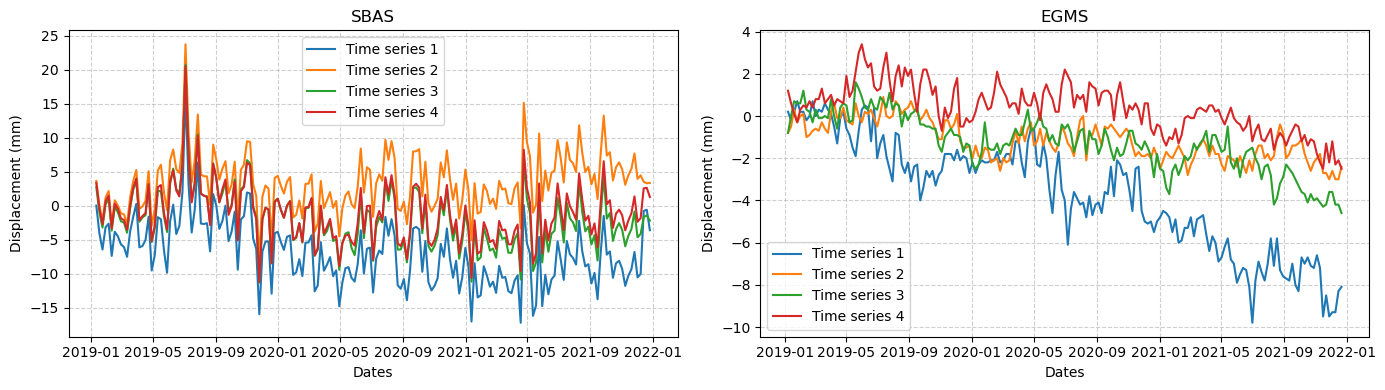

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, df in enumerate(df_sbas):
    axes[0].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

axes[0].set_title('SBAS')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Displacement (mm)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, df in enumerate(df_egms):
    axes[1].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

axes[1].set_title('EGMS')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Displacement (mm)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

For a better understading we will decompose the time series using the Fourier Transform

In [5]:
ft_sbas = []
ft_egms = []

for i in range(len(df_sbas)):

    f_sbas = df_sbas[i]["displacement_mm"]
    f_egms = df_egms[i]["displacement_mm"]

    ft_sbas.append(fft(f_sbas))
    ft_egms.append(fft(f_egms))

ft_sbas = np.array(ft_sbas)
ft_egms = np.array(ft_egms)

step_size = 4 / ft_sbas.shape[1]  # Each step is 4 months
frequencies = fftfreq(ft_sbas.shape[1], step_size)

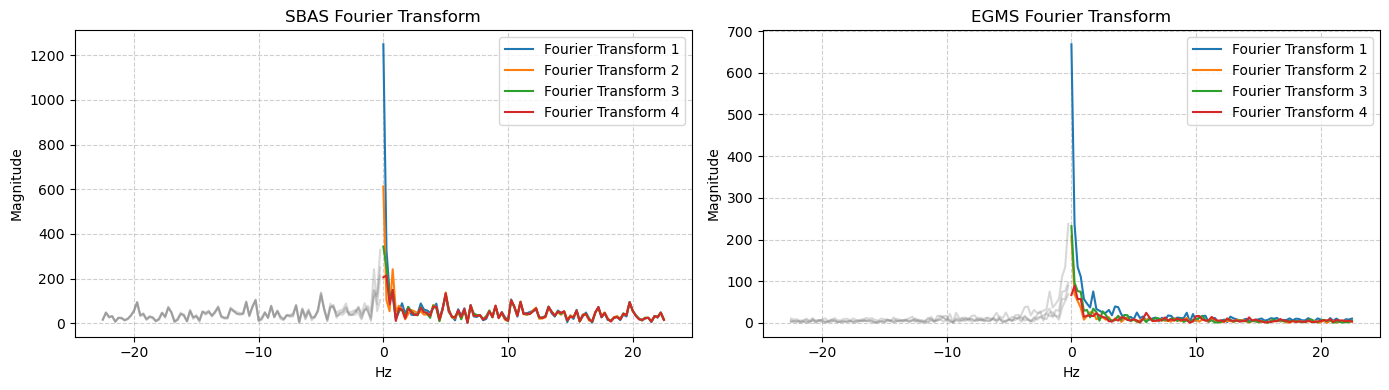

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, ft in enumerate(ft_sbas):
    magnitude = np.abs(ft)
    axes[0].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[0].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

axes[0].set_title('SBAS Fourier Transform')
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('Magnitude')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, ft in enumerate(ft_egms):
    magnitude = np.abs(ft)
    axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

axes[1].set_title('EGMS Fourier Transform')
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('Magnitude')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

Now, we can filter by intervals of frequencies for extracting trends

In [7]:
d_omega = 0.4
n_intervals = 7
intervals = []

for i in range(0, n_intervals-1):
    interval = (i * d_omega, (i + 1) * d_omega)
    intervals.append(interval)

intervals.append((intervals[-1][1], max(frequencies)))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'violet']

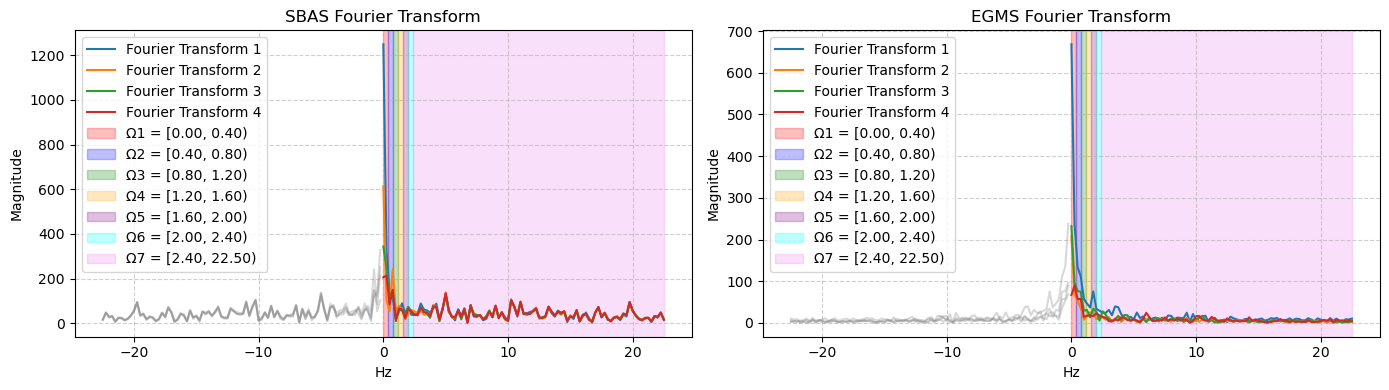

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, ft in enumerate(ft_sbas):
    magnitude = np.abs(ft)
    axes[0].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[0].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

for i, interval in enumerate(intervals):
    color = colors[i % len(colors)]
    axes[0].axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i + 1} = [{interval[0]:.2f}, {interval[1]:.2f})')

axes[0].set_title('SBAS Fourier Transform')
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('Magnitude')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, ft in enumerate(ft_egms):
    magnitude = np.abs(ft)
    axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

for i, interval in enumerate(intervals):
    color = colors[i % len(colors)]
    axes[1].axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i + 1} = [{interval[0]:.2f}, {interval[1]:.2f})')

axes[1].set_title('EGMS Fourier Transform')
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('Magnitude')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

In [9]:
def filter(ft: np.array) -> tuple[list, list]:

    F_hat: list[np.array] = []
    psi: list[np.array] = []

    for low, high in intervals:

        F_hat_i = ft.copy()

        mask_i = (np.abs(frequencies) >= low) & (np.abs(frequencies) < high)
        F_hat_i[~mask_i] = 0
        psi_i = ifft(F_hat_i).real

        F_hat.append(F_hat_i)
        psi.append(psi_i)

    F_hat = np.array(F_hat)
    psi = np.array(psi)

    return F_hat, psi


F_hat_sbas = []
psi_sbas = []

for ft in ft_sbas:
    F_hat_sbas_i, psi_sbas_i = filter(ft)
    F_hat_sbas.append(F_hat_sbas_i)
    psi_sbas.append(psi_sbas_i)

F_hat_egms = []
psi_egms = []

for ft in ft_egms:
    F_hat_egms_i, psi_egms_i = filter(ft)
    F_hat_egms.append(F_hat_egms_i)
    psi_egms.append(psi_egms_i)


In [29]:
def plot_filtered_superposed(F_hat_list, psi_list, title="") -> None:

    n_sbas = len(F_hat_list)
    n_components = F_hat_list[0].shape[0]

    # Scales
    max_F = max(np.max(np.abs(F_hat)) for F_hat in F_hat_list)
    max_psi = max(np.max(np.abs(psi)) for psi in psi_list)

    fig, axes = plt.subplots(2, n_components, figsize=(4 * n_components, 8))
    fig.suptitle(title, fontsize=16)

    for k in range(n_components):

        # F_hat
        axF = axes[0, k]
        axF.set_title(f"Filtered Fourier Transform F_hat_{k+1}")
        axF.set_ylim(0, max_F)
        axF.grid(True, linestyle='--', alpha=0.6)

        pos = frequencies >= 0
        neg = frequencies < 0

        for i in range(n_sbas):
            axF.plot(
                frequencies[pos],
                np.abs(F_hat_list[i][k, pos]),
                label=f"Filtered Fourier Transform {i+1}"
            )

        axF.legend(fontsize=8)
        axF.set_xlabel("Frequency (Hz)")
        axF.set_ylabel(f"|F_hat_{k+1}|")
        axF.xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.setp(axF.get_xticklabels(), rotation=45, ha="right")

        # psi(t)
        axT = axes[1, k]
        axT.set_title(f"Inverse Transform psi_{k+1}")
        axT.set_ylim(-max_psi, max_psi)
        axT.grid(True, linestyle='--', alpha=0.6)

        for i in range(n_sbas):
            axT.plot(
                df_sbas[0].index,
                psi_list[i][k],
                label=f"Filtered time series {i+1}"
            )

        axT.legend(fontsize=8)
        axT.set_xlabel("Time (t)")
        axT.set_ylabel(f"psi_{k+1}(t)")
        axT.xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.setp(axT.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


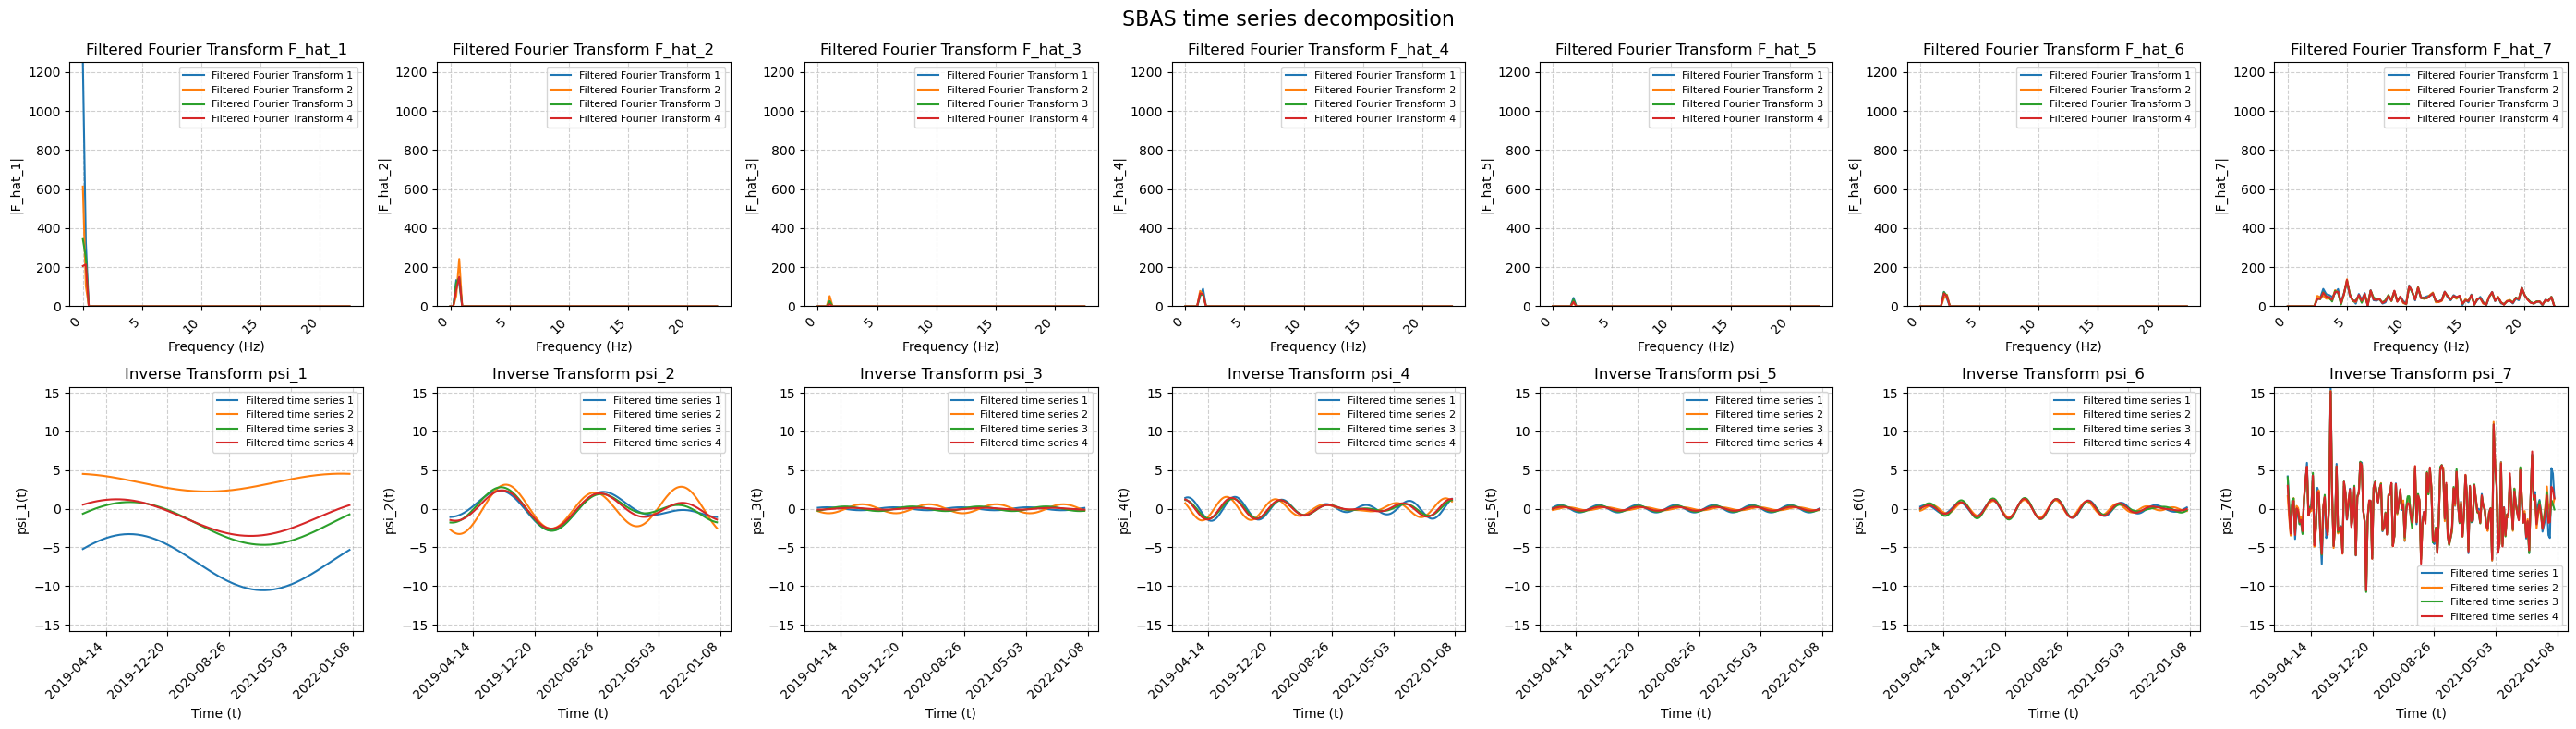

In [30]:
plot_filtered_superposed(F_hat_sbas, psi_sbas, "SBAS time series decomposition")

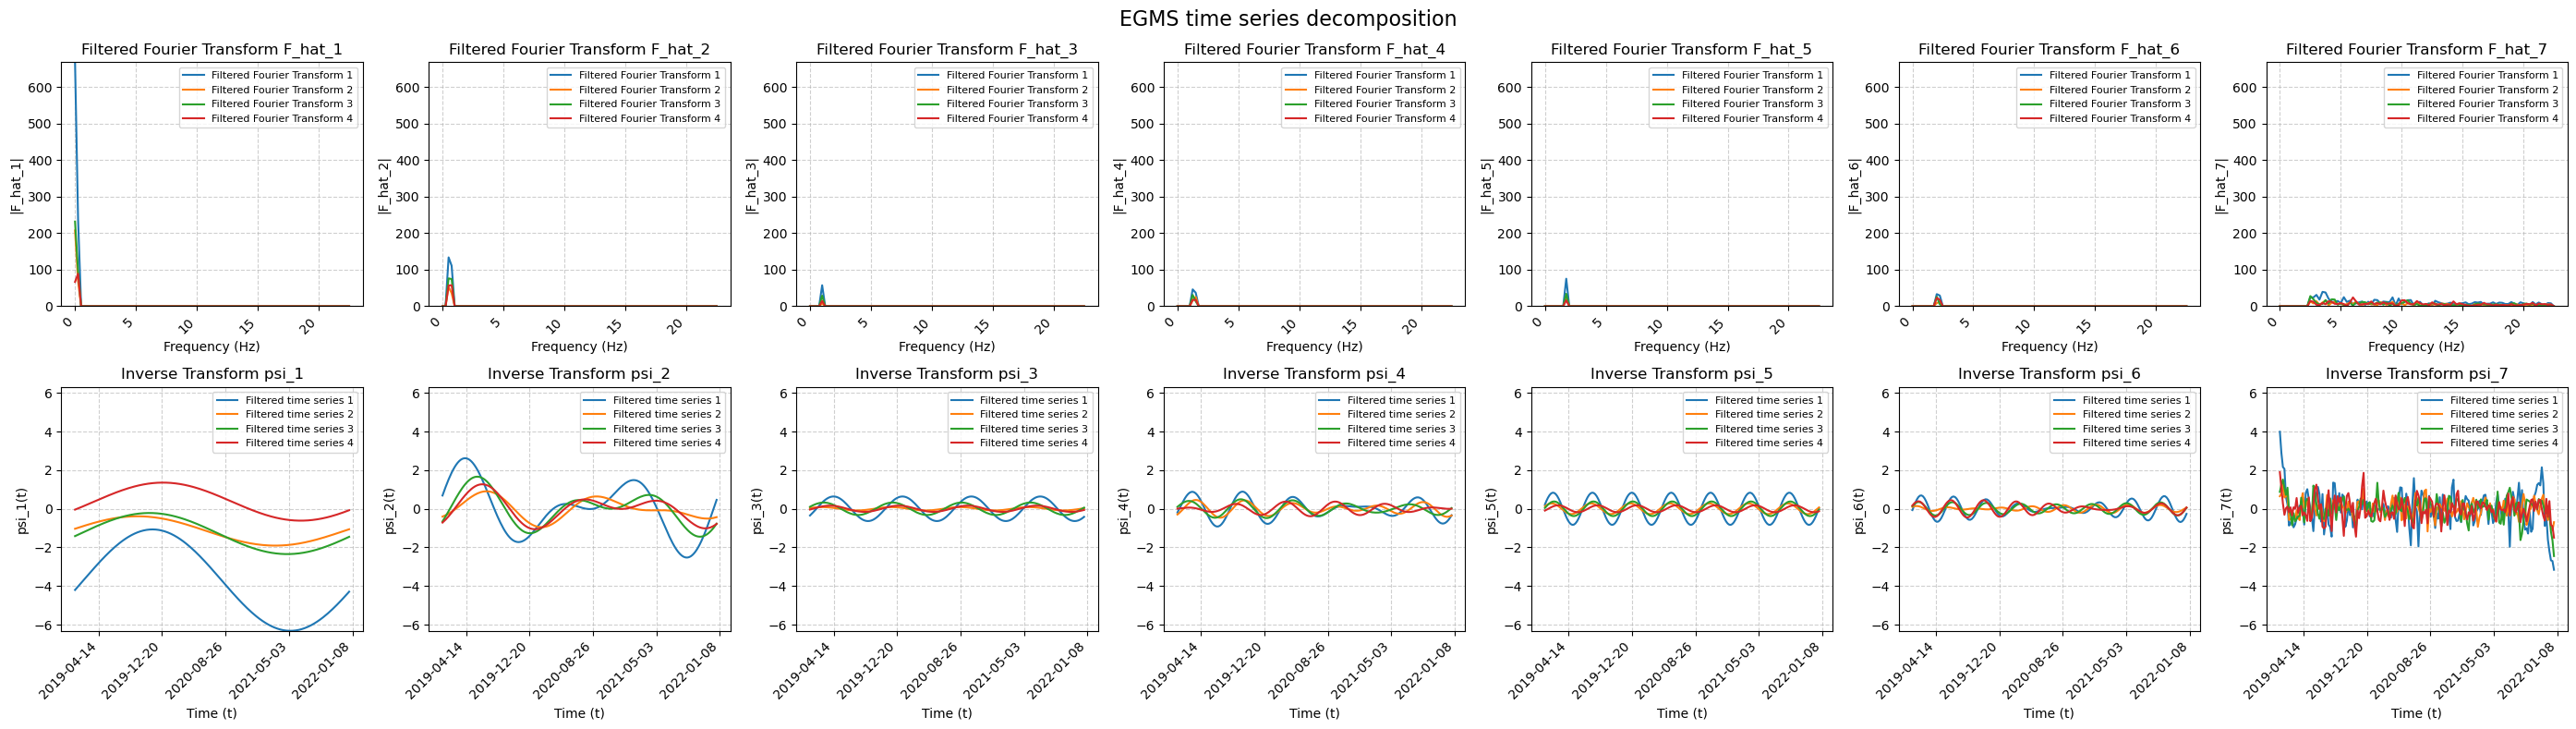

In [31]:
plot_filtered_superposed(F_hat_egms, psi_egms, "EGMS time series decomposition")

We can see in both plots, SBAS and EGMS time series decomposition that the last interval of frequencies is noise. And the rest contain the DETERMINISTIC functions that define the whole deformation.

In [13]:
smooth_time_series_sbas = []

for i, df in enumerate(df_sbas):
    time_series_i = df["displacement_mm"]
    smooth_time_series_i = time_series_i - psi_sbas[i][-1]
    smooth_time_series_sbas.append(smooth_time_series_i)

smooth_time_series_egms = []

for i, df in enumerate(df_egms):
    time_series_i = df["displacement_mm"]
    smooth_time_series_i = time_series_i - psi_egms[i][-1]
    smooth_time_series_egms.append(smooth_time_series_i)

In [32]:
def plot_smooth(df_method, smooth, title) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Original
    for i, df in enumerate(df_method):
        axes[0].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

    axes[0].set_title(title)
    axes[0].set_xlabel('Dates')
    axes[0].set_ylabel('Displacement (mm)')
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].legend()

    # Smooth
    for i, smooth_time_series in enumerate(smooth):
        axes[1].plot(df.index, smooth_time_series, label=f"Smooth time series {i + 1}")

    axes[1].set_title(f'{title} smooth')
    axes[1].set_xlabel('Dates')
    axes[1].set_ylabel('Displacement (mm)')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].legend()

    # Scale
    all_series = [df["displacement_mm"] for df in df_method] + smooth
    y_min = min([series.min() for series in all_series])
    y_max = max([series.max() for series in all_series])

    axes[0].set_ylim(y_min, y_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

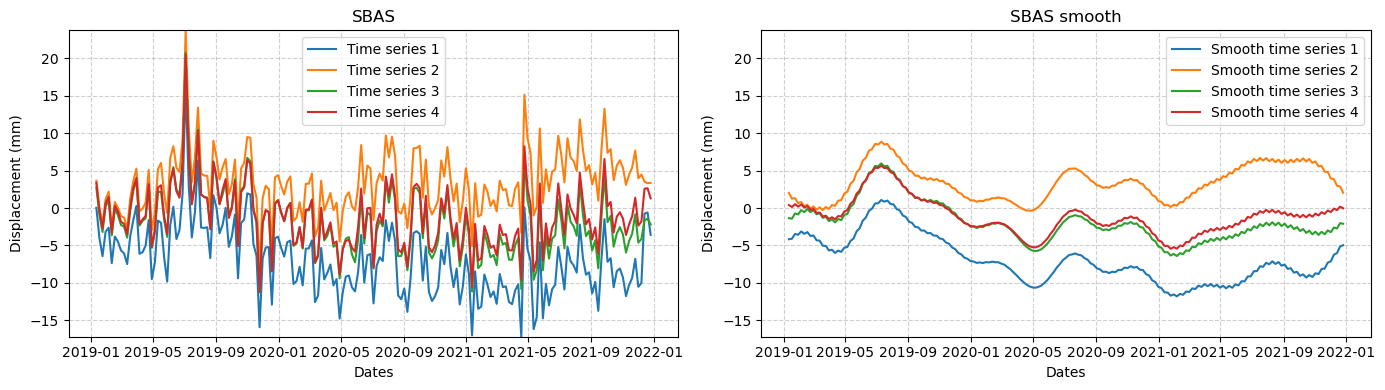

In [33]:
plot_smooth(df_sbas, smooth_time_series_sbas, 'SBAS')

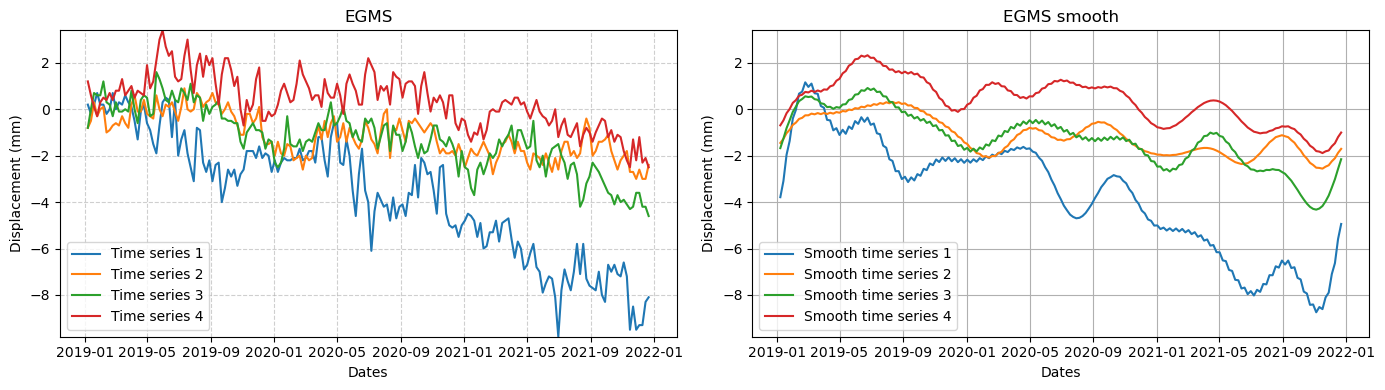

In [16]:
plot_smooth(df_egms, smooth_time_series_egms, 'EGMS')

Since we see a peak in every Fourier Transform in the first inverval that corresponds with the sesonality, we can just remove it from the smooth time series in order to get rid of the noise and seasonality and get the deformation caused by different natural/artificial processes.

In [20]:
deformation_time_series_sbas = []

for i, smooth_time_series in enumerate(smooth_time_series_sbas):
    deformation_time_series_sbas_i = smooth_time_series - psi_sbas[i][0]
    deformation_time_series_sbas.append(deformation_time_series_sbas_i)

deformation_time_series_egms = []

for i, smooth_time_series in enumerate(smooth_time_series_egms):
    deformation_time_series_egms_i = smooth_time_series - psi_egms[i][0]
    deformation_time_series_egms.append(deformation_time_series_egms_i)

In [34]:
def plot_deformation(smooth, deformation, title) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Smooth
    for i, smooth_time_series in enumerate(smooth):
        axes[0].plot(df.index, smooth_time_series, label=f"Smooth time series {i + 1}")

    axes[0].set_title(f'{title} smooth')
    axes[0].set_xlabel('Dates')
    axes[0].set_ylabel('Displacement (mm)')
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].legend()

    # Deformation
    for i, deformation_time_series in enumerate(deformation):
        axes[1].plot(df.index, deformation_time_series, label=f"Deformation time series {i + 1}")

    axes[1].set_title(f'{title} deformation')
    axes[1].set_xlabel('Dates')
    axes[1].set_ylabel('Displacement (mm)')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].legend()

    # Scale
    all_series =  smooth + deformation
    y_min = min([series.min() for series in all_series])
    y_max = max([series.max() for series in all_series])

    axes[0].set_ylim(y_min, y_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

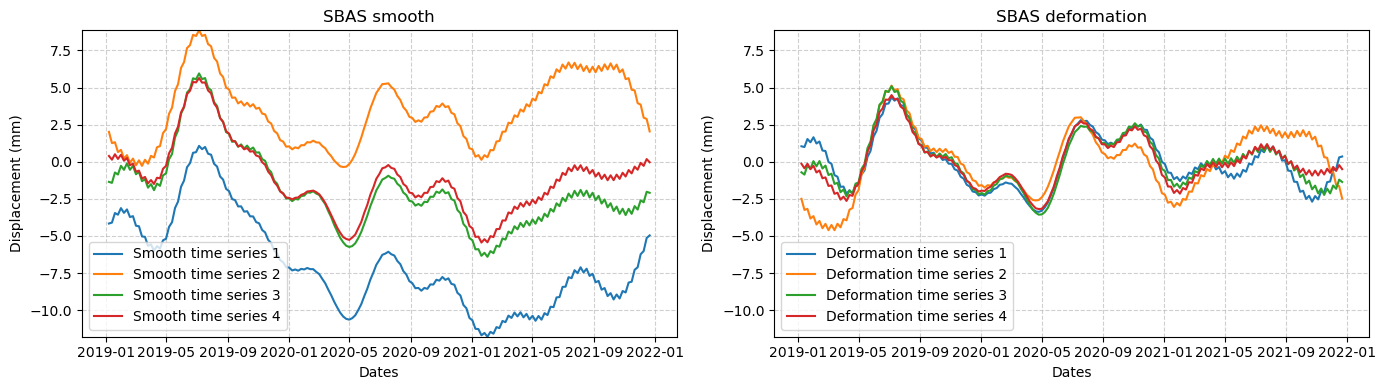

In [35]:
plot_deformation(smooth_time_series_sbas, deformation_time_series_sbas, 'SBAS')

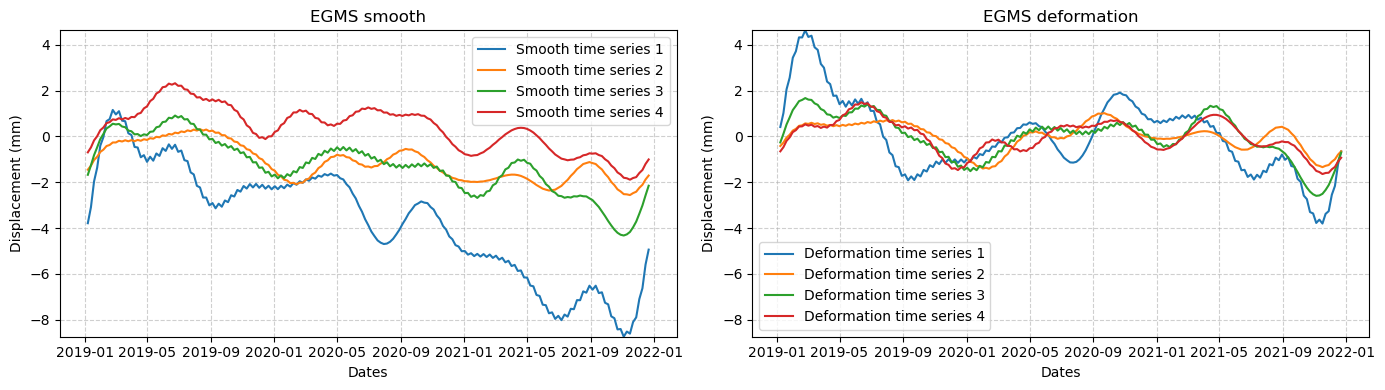

In [36]:
plot_deformation(smooth_time_series_egms, deformation_time_series_egms, 'EGMS')